//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


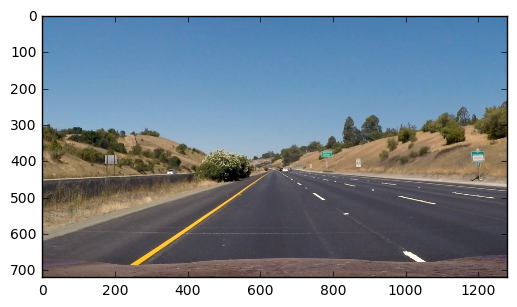

In [2]:
import matplotlib
matplotlib.use("Qt5Agg")
#%matplotlib qt
%matplotlib inline

import numpy as np
import cv2
from glob import glob
from PIL import Image
from ipywidgets import interact, fixed, IntSlider
from matplotlib import pyplot as plt
from itertools import islice

import matplotlib.pyplot as plt

img = Image.open('test_images/straight_lines1.jpg')
plt.imshow(img)
plt.show()

In [14]:
def show_images(images):
    fig = plt.figure()
    for i in range(len(images)):
        img = images[i]
        print(img.shape)
        a = fig.add_subplot(1, len(images), i + 1)
        plt.imshow(img, cmap=(None if len(img.shape) == 3 else 'gray'))
        #plt.axis('off')
    plt.show()

def show_hsv(images):
    show_images(cv2.cvtColor(img, cv2.COLOR_HSV2RGB) for img in images)


(720, 1280, 3)
(720, 1280, 3)


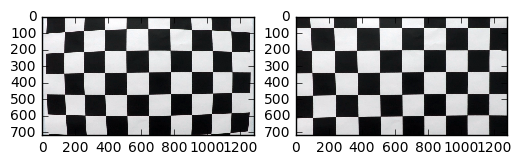

(720, 1280, 3)
(720, 1280, 3)


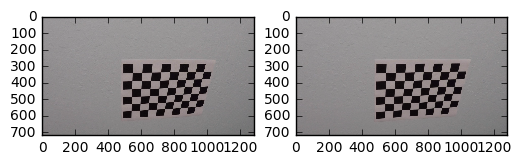

In [15]:
chess_shape = (9, 6)
objpoints = []
imgpoints = []
objp = np.zeros((6*9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1, 2)
for path in glob('camera_cal/*'):
    img = cv2.imread(path) 
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, chess_shape, None)
    
    if ret:
        imgpoints.append(corners)
        objpoints.append(objp)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

def undistort(img):
    return cv2.undistort(img, mtx, dist, None, mtx)

for path in islice(glob('camera_cal/*'), 2):
    img = cv2.imread(path)
    dst = undistort(img)
    show_images([img, dst])

(720, 1280, 3)
(720, 1280, 3)


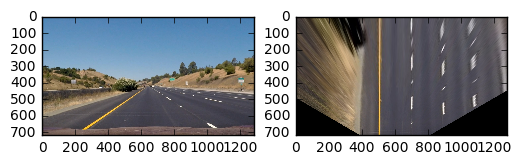

(720, 1280, 3)
(720, 1280, 3)


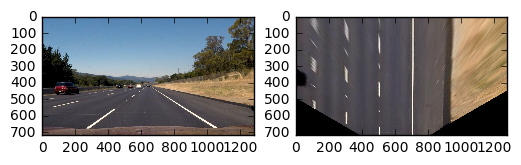

(720, 1280, 3)
(720, 1280, 3)


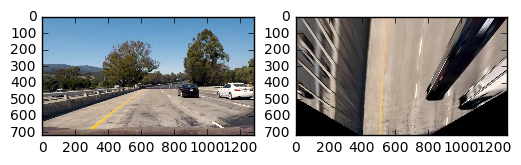

(720, 1280, 3)
(720, 1280, 3)


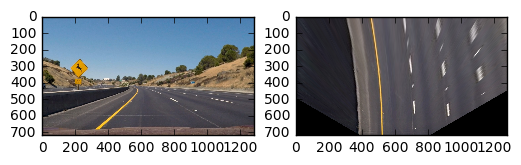

(720, 1280, 3)
(720, 1280, 3)


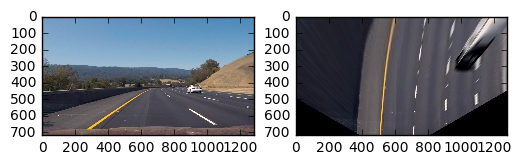

In [16]:
# TODO: Look for better points

src = np.float32([
        [180, 565],
        [500, 465],
        [835, 465],
        [1280, 565]])

src = np.float32([
        [253, 685],
        [572, 465],
        [709, 465],
        [1052, 685]])

dst = np.float32([
        [500, 750],
        [500, 300],
        [700, 300],
        [700, 750]])

M = cv2.getPerspectiveTransform(src, dst)

def get_road(img):
    img_size = (img.shape[1], img.shape[0])
    # we mostly are interested in upscaling and CUBIC seems to be quite good
    # http://tanbakuchi.com/posts/comparison-of-openv-interpolation-algorithms/
    return cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_CUBIC)
    
for i in islice(glob('test_images/*'), 5):
    img = np.asarray(Image.open(i))
    road = get_road(img)
    show_images([img, road])

(738, 1280)


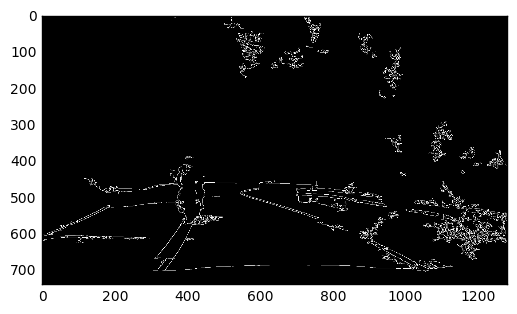

In [25]:
def find_lane_yellow_mask(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h = hsv[:,:,0]
    mask = np.zeros_like(h)
    mask[(h > 15) & (h <= 31)] = 1
    return mask
    
def find_lane_gray_mask(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    mask = np.zeros_like(gray)
    mask[gray >= 225] = 1
    return mask

def try_flood_fill(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    h, w = img.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    for i in range(10):
        p = img[mask == 0]

for i in islice(glob('test_images2/*'), 2):
    img = np.array(Image.open(i))
    #show_images([find_lane_yellow_mask(img), find_lane_gray_mask(img)])
    #try_flood_fill(img)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(img,100,200)
    show_images([gray])
    show_images([edges])

def try_convolve(img):
    from scipy import signal
    
@interact(img = fixed(img), low=(0,500), high=(0, 500))
def apply_canny(img, low, high):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, low, high)
    show_images([edges])

    #hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    #show_hsv(hsv)
    
    #h = hsv[:,:,0]
    #s = hsv[:,:,1]
    #v = hsv[:,:,2]
    #show_gray([h, s, v])
    # yellow is 15 <= hue < 31
    #img[(h < 15) | (25 < h)] = 0
    #show_rgb(img)
    
    #interact(show_image, imm = fixed(img), light=IntSlider(min=0, max=255, value=200))
        
